# mobile proce classification #

## loading data ##

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls 'drive/MyDrive/machine learning university/mobile price prediction'

test.csv  train.csv


In [3]:
#for read and manipulate data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
train = pd.read_csv('drive/MyDrive/machine learning university/mobile price prediction/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## train test split ##

In [6]:
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['price_range']), train.price_range, test_size=0.2, random_state=0)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

## scaling ##

In [8]:
sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = sc.transform(x_test[x_test.columns])

In [9]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320
159,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320
1827,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305
318,-1.639756,-0.965592,-0.902852,-1.016384,0.647241,0.976525,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,0.564840,-0.986343,-1.025320
708,-0.578580,1.035635,1.548469,0.983880,-0.515555,-1.024039,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,-1.770414,1.013846,0.975305


In [10]:
x_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,0.500697,1.035635,-1.270550,0.983880,-0.748114,-1.024039,0.119443,0.693843,-1.593807,-0.223529,-1.123596,-0.910359,-0.525631,1.221190,-1.271991,-0.186208,-1.095663,0.564840,1.013846,-1.025320
1190,-0.318377,1.035635,-1.270550,0.983880,1.344919,-1.024039,-1.145809,0.000650,0.795943,-0.663437,0.689320,-0.420591,-1.590970,-1.268884,0.403650,-0.413811,-0.001026,-1.770414,1.013846,-1.025320
1132,0.659082,1.035635,0.322808,0.983880,-0.980673,-1.024039,-1.200820,0.347246,0.995089,-0.223529,-1.453217,-1.126037,-1.639394,0.533217,0.882404,-0.186208,0.363853,0.564840,-0.986343,0.975305
731,1.299408,1.035635,0.690506,-1.016384,-0.515555,-1.024039,0.944607,1.040440,-0.398932,-1.543255,0.030078,-0.714901,0.283750,-0.183538,1.121782,1.634619,0.363853,-1.770414,1.013846,0.975305
1754,-0.331953,1.035635,0.200242,0.983880,-0.980673,0.976525,0.614541,-1.039140,-0.797224,0.656289,-1.453217,-1.346208,-0.255837,1.096779,-0.314482,-0.186208,1.093610,0.564840,1.013846,-1.025320


## SVC Polynomial Kernel ##

In [16]:
from sklearn.svm import SVC

svc_poly_2 = SVC(kernel='poly', degree=2, decision_function_shape='ovr')
svc_poly_2.fit(x_train, y_train)
y_prd = svc_poly_2.predict(x_test)
score = svc_poly_2.score(x_test, y_test)
score

0.465

In [19]:
svc_poly_3 = SVC(kernel='poly', degree=3, decision_function_shape='ovr')
svc_poly_3.fit(x_train, y_train)
y_prd_3 = svc_poly_3.predict(x_test)
score = svc_poly_3.score(x_test, y_test)
score

0.8025

In [18]:
svc_poly_4 = SVC(kernel='poly', degree=4, decision_function_shape='ovr')
svc_poly_4.fit(x_train, y_train)
y_prd = svc_poly_4.predict(x_test)
score = svc_poly_4.score(x_test, y_test)
score

0.4525

In [20]:
from sklearn.metrics import precision_recall_fscore_support

percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd_3)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.94318182 0.69306931 0.66371681 0.94897959]
recall: [0.87368421 0.76086957 0.75757576 0.81578947]
f1score: [0.90710383 0.7253886  0.70754717 0.87735849]


## SVC rbf kernel ##

In [22]:
svc_rbf = SVC(kernel='rbf', decision_function_shape='ovr')
svc_rbf.fit(x_train, y_train)
y_prd_rbf = svc_rbf.predict(x_test)
score = svc_rbf.score(x_test, y_test)
score

0.89

In [23]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd_rbf)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.95698925 0.82       0.82178218 0.96226415]
recall: [0.93684211 0.89130435 0.83838384 0.89473684]
f1score: [0.94680851 0.85416667 0.83       0.92727273]


## SVC sigmoid kernel ##

In [25]:
svc_sigmoid = SVC(kernel='sigmoid', decision_function_shape='ovr')
svc_sigmoid.fit(x_train, y_train)
y_prd_sig = svc_sigmoid.predict(x_test)
score = svc_sigmoid.score(x_test, y_test)
score

0.915

In [26]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd_sig)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.96774194 0.83495146 0.9010989  0.95575221]
recall: [0.94736842 0.93478261 0.82828283 0.94736842]
f1score: [0.95744681 0.88205128 0.86315789 0.95154185]


## SVC Linear kernel ##

In [27]:
svc_linear = SVC(kernel='linear', decision_function_shape='ovr')
svc_linear.fit(x_train, y_train)
y_prd_lin = svc_linear.predict(x_test)
score = svc_linear.score(x_test, y_test)
score

0.9525

In [28]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd_sig)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.96774194 0.83495146 0.9010989  0.95575221]
recall: [0.94736842 0.93478261 0.82828283 0.94736842]
f1score: [0.95744681 0.88205128 0.86315789 0.95154185]


## SVC soft and hard margin ##

### hard margin ###

In [37]:
# on linear
svc_linear = SVC(kernel='linear', decision_function_shape='ovr', C=0.001)
svc_linear.fit(x_train, y_train)
y_prd_lin = svc_linear.predict(x_test)
score = svc_linear.score(x_test, y_test)
score

0.3175

In [38]:
svc_rbf = SVC(kernel='rbf', decision_function_shape='ovr' ,C=0.1)
svc_rbf.fit(x_train, y_train)
y_prd_rbf = svc_rbf.predict(x_test)
score = svc_rbf.score(x_test, y_test)
score

0.6425

### soft margin ###

In [36]:
# on linear
svc_linear = SVC(kernel='linear', decision_function_shape='ovr', C=100.0)
svc_linear.fit(x_train, y_train)
y_prd_lin = svc_linear.predict(x_test)
score = svc_linear.score(x_test, y_test)
score

0.9575

In [39]:
svc_rbf = SVC(kernel='rbf', decision_function_shape='ovr' ,C=100.0)
svc_rbf.fit(x_train, y_train)
y_prd_rbf = svc_rbf.predict(x_test)
score = svc_rbf.score(x_test, y_test)
score

0.89

## bining (battery power)##

In [40]:
x_train_bp = train.drop(columns=['price_range'])
y_train_bp = train['price_range']

min_value = x_train_bp['battery_power'].min()
max_value = x_train_bp['battery_power'].max()

bins = np.linspace(min_value,max_value,4)
bins

array([ 501., 1000., 1499., 1998.])

In [41]:
labels = ['low', 'medium', 'high']

x_train_bp['battery_power'] = pd.cut(x_train_bp['battery_power'], bins=bins, labels=labels, include_lowest=True)
x_train_bp

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,low,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,medium,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,low,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,low,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,high,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,low,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,high,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,high,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,high,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


(array([697., 641., 662.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

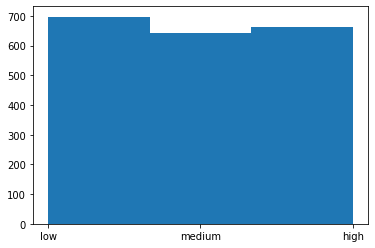

In [43]:
plt.hist(x_train_bp['battery_power'], bins=3)

## one hot encoding ##

In [44]:
# there is no categorical feature in the actual dataset so we use the binnig result on 
# battery power column
categorical_subset = x_train_bp['battery_power']
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()

,low,medium,high
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1


In [46]:
x_train_bp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,low,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,medium,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,low,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,low,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,high,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [47]:
x_train_ohe = x_train_bp.drop(columns=['battery_power'])
x_train_ohe = pd.concat([x_train_ohe, categorical_subset], axis=1)

NameError: ignored

In [48]:
x_train_ohe.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,low,medium,high
0,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,0,0
1,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,0,1,0
2,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1,0,0
3,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1,0,0
4,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0,0,1


## log transform ##

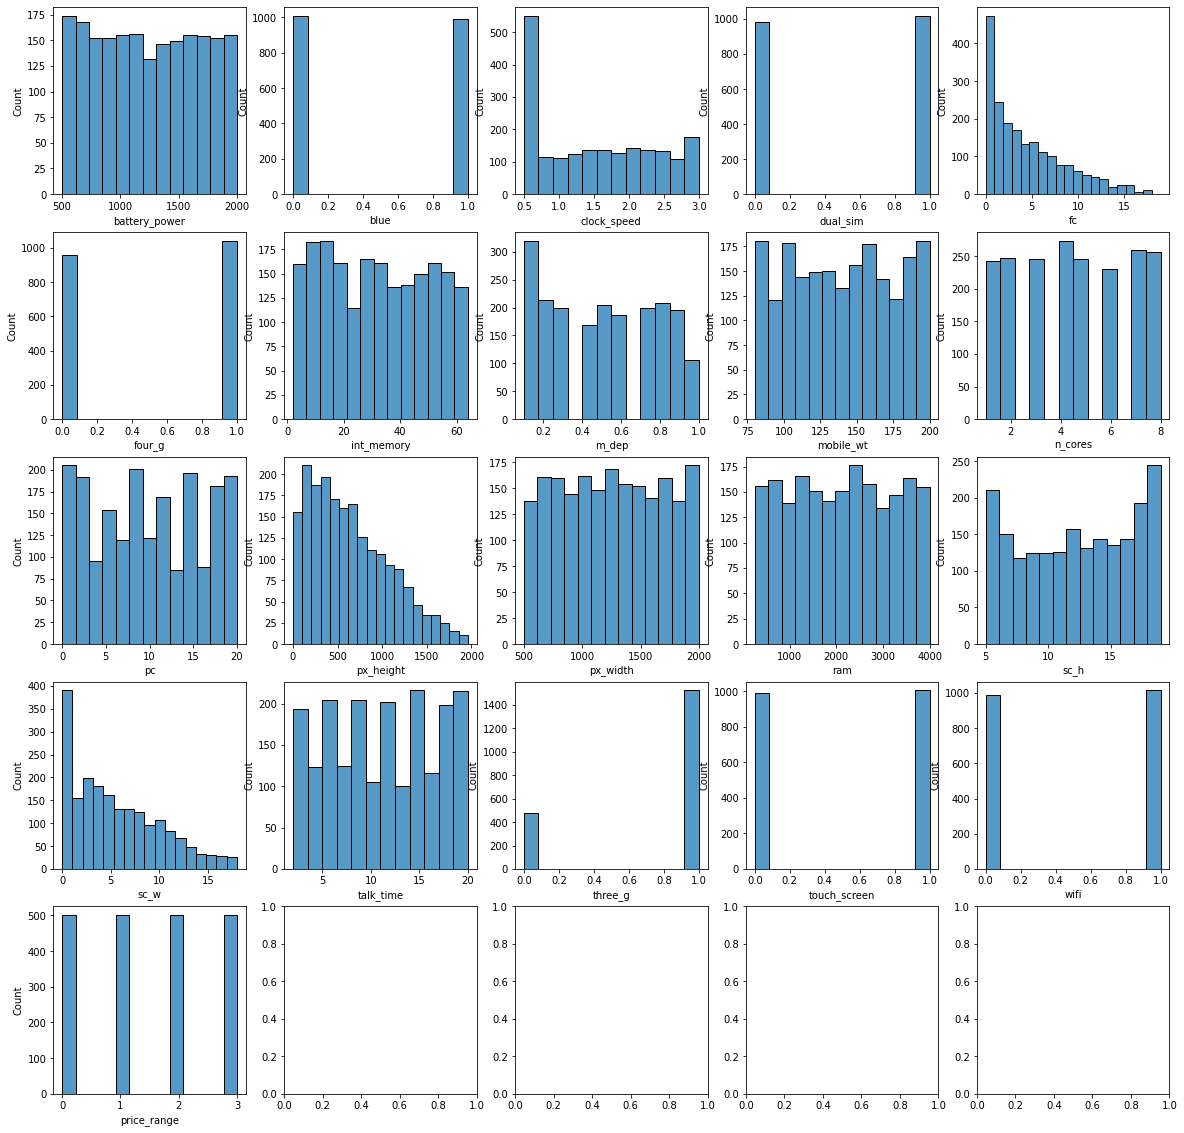

In [58]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
for i, column in enumerate(train.columns):
    sns.histplot(train[column],ax=axes[i//5,i%5])

In [69]:
# sc_w and fc can be log transformed
train_log = train.copy()
train_log['sc_w'] = train['sc_w'].apply(lambda x: np.log(x+1))
train_log['fc'] = train['fc'].apply(lambda x: np.log(x+1))
train_log['fc']

0       0.693147
1       0.000000
2       1.098612
3       0.000000
4       2.639057
          ...   
1995    0.000000
1996    0.000000
1997    0.693147
1998    1.609438
1999    1.791759
Name: fc, Length: 2000, dtype: float64

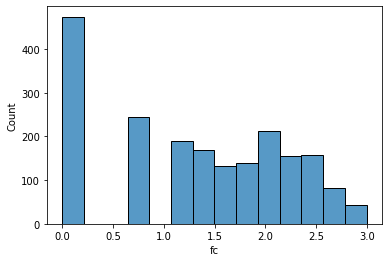

In [61]:
sns.histplot(train_log['fc'])

## area ##

In [62]:
train_ar = train.copy()
train_ar['area'] = train['px_width'] * train['px_height']
train_ar.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1464096


## SVC on new features ##

### SVC on binning battery power ###

In [64]:
x_trn_ohe, x_tst_ohe, y_trn_ohe, y_tst_ohe = train_test_split(x_train_ohe, y_train_bp, test_size=0.2, random_state=0)

In [65]:
svc_linear = SVC(kernel='linear', decision_function_shape='ovr')
svc_linear.fit(x_trn_ohe, y_trn_ohe)
y_prd_lin = svc_linear.predict(x_tst_ohe)
score = svc_linear.score(x_tst_ohe, y_tst_ohe)
score

0.94

In [66]:
percision, recall, f1score, support = precision_recall_fscore_support(y_tst_ohe, y_prd_lin)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.95876289 0.93333333 0.91752577 0.94827586]
recall: [0.97894737 0.91304348 0.8989899  0.96491228]
f1score: [0.96875    0.92307692 0.90816327 0.95652174]


### SVC on log transform ###

In [70]:
x_train_lg, x_test_lg, y_train_lg, y_test_lg = train_test_split(train_log.drop(columns=['price_range']), train_log.price_range, test_size=0.2, random_state=0)

In [71]:
x_train_lg.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,1232,0,2.9,1,0.693147,1,24,0.3,169,5,17,361,809,1257,16,2.397895,16,1,0,0
159,1840,0,0.5,1,2.564949,0,34,0.7,142,1,16,311,1545,1078,8,0.000000,10,0,0,0
1827,1692,0,2.1,0,1.609438,1,2,0.9,106,1,17,1899,1904,3779,9,1.386294,7,1,1,1
318,508,0,0.8,0,2.079442,1,42,0.3,94,1,8,39,557,663,13,2.564949,7,1,0,0
708,977,1,2.8,1,1.098612,0,35,0.6,165,2,15,1502,1862,3714,19,1.386294,10,0,1,1


In [72]:
sc = StandardScaler()
x_train_lg[x_train_lg.columns] = sc.fit_transform(x_train_lg[x_train_lg.columns])
x_test_lg[x_test_lg.columns] = sc.transform(x_test_lg[x_test_lg.columns])

In [73]:
x_test_lg.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,0.500697,1.035635,-1.270550,0.983880,-0.641549,-1.024039,0.119443,0.693843,-1.593807,-0.223529,-1.123596,-0.910359,-0.525631,1.221190,-1.271991,0.169781,-1.095663,0.564840,1.013846,-1.025320
1190,-0.318377,1.035635,-1.270550,0.983880,1.231190,-1.024039,-1.145809,0.000650,0.795943,-0.663437,0.689320,-0.420591,-1.590970,-1.268884,0.403650,-0.059452,-0.001026,-1.770414,1.013846,-1.025320
1132,0.659082,1.035635,0.322808,0.983880,-1.403001,-1.024039,-1.200820,0.347246,0.995089,-0.223529,-1.453217,-1.126037,-1.639394,0.533217,0.882404,0.169781,0.363853,0.564840,-0.986343,0.975305
731,1.299408,1.035635,0.690506,-1.016384,-0.196128,-1.024039,0.944607,1.040440,-0.398932,-1.543255,0.030078,-0.714901,0.283750,-0.183538,1.121782,1.235092,0.363853,-1.770414,1.013846,0.975305
1754,-0.331953,1.035635,0.200242,0.983880,-1.403001,0.976525,0.614541,-1.039140,-0.797224,0.656289,-1.453217,-1.346208,-0.255837,1.096779,-0.314482,0.169781,1.093610,0.564840,1.013846,-1.025320


In [77]:
svc_linear = SVC(kernel='linear', decision_function_shape='ovr')
svc_linear.fit(x_train_lg, y_train_lg)
y_prd_lin = svc_linear.predict(x_test_lg)
score = svc_linear.score(x_test_lg, y_test_lg)
score

0.955

In [78]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test_lg, y_prd_lin)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.96875    0.93478261 0.95744681 0.95762712]
recall: [0.97894737 0.93478261 0.90909091 0.99122807]
f1score: [0.97382199 0.93478261 0.93264249 0.97413793]


### SVC on area ###

In [79]:
x_train_ar, x_test_ar, y_train_ar, y_test_ar = train_test_split(train_ar.drop(columns=['price_range']), train_ar.price_range, test_size=0.2, random_state=0)

In [80]:
sc = StandardScaler()
x_train_ar[x_train_ar.columns] = sc.fit_transform(x_train_ar[x_train_ar.columns])
x_test_ar[x_test_ar.columns] = sc.transform(x_test_ar[x_test_ar.columns])

In [82]:
x_test_ar.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,area
405,0.500697,1.035635,-1.270550,0.983880,-0.748114,-1.024039,0.119443,0.693843,-1.593807,-0.223529,-1.123596,-0.910359,-0.525631,1.221190,-1.271991,-0.186208,-1.095663,0.564840,1.013846,-1.025320,-0.798764
1190,-0.318377,1.035635,-1.270550,0.983880,1.344919,-1.024039,-1.145809,0.000650,0.795943,-0.663437,0.689320,-0.420591,-1.590970,-1.268884,0.403650,-0.413811,-0.001026,-1.770414,1.013846,-1.025320,-0.787987
1132,0.659082,1.035635,0.322808,0.983880,-0.980673,-1.024039,-1.200820,0.347246,0.995089,-0.223529,-1.453217,-1.126037,-1.639394,0.533217,0.882404,-0.186208,0.363853,0.564840,-0.986343,0.975305,-1.007095
731,1.299408,1.035635,0.690506,-1.016384,-0.515555,-1.024039,0.944607,1.040440,-0.398932,-1.543255,0.030078,-0.714901,0.283750,-0.183538,1.121782,1.634619,0.363853,-1.770414,1.013846,0.975305,-0.548890
1754,-0.331953,1.035635,0.200242,0.983880,-0.980673,0.976525,0.614541,-1.039140,-0.797224,0.656289,-1.453217,-1.346208,-0.255837,1.096779,-0.314482,-0.186208,1.093610,0.564840,1.013846,-1.025320,-1.031463


In [83]:
svc_linear = SVC(kernel='linear', decision_function_shape='ovr')
svc_linear.fit(x_train_ar, y_train_ar)
y_prd_lin = svc_linear.predict(x_test_ar)
score = svc_linear.score(x_test_ar, y_test_ar)
score

0.9575

In [84]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test_ar, y_prd_lin)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.97916667 0.93548387 0.95698925 0.95762712]
recall: [0.98947368 0.94565217 0.8989899  0.99122807]
f1score: [0.98429319 0.94054054 0.92708333 0.97413793]


## Decision tree ##

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(min_samples_split=4, min_samples_leaf=2)
dt_clf = dt_clf.fit(x_train, y_train)
y_prd_dt = dt_clf.predict(x_test)
score = dt_clf.score(x_test, y_test)
score

0.8425

In [91]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd_dt)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.92857143 0.80681818 0.74       0.88596491]
recall: [0.95789474 0.77173913 0.74747475 0.88596491]
f1score: [0.94300518 0.78888889 0.74371859 0.88596491]


In [92]:
#different parameters
dt_clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, min_samples_leaf=2, max_features='sqrt')
dt_clf = dt_clf.fit(x_train, y_train)
y_prd_dt = dt_clf.predict(x_test)
score = dt_clf.score(x_test, y_test)
score

0.59

In [93]:
#different parameters
dt_clf = DecisionTreeClassifier(min_samples_split=8, min_samples_leaf=4, max_features='sqrt')
dt_clf = dt_clf.fit(x_train, y_train)
y_prd_dt = dt_clf.predict(x_test)
score = dt_clf.score(x_test, y_test)
score

0.62

## Random forest ##

In [101]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=700, min_samples_split=5, min_samples_leaf=3)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)
score = rnd_clf.score(x_test, y_test)
score

0.8625

In [102]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_pred_rf)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.93877551 0.77419355 0.77894737 0.93859649]
recall: [0.96842105 0.7826087  0.74747475 0.93859649]
f1score: [0.95336788 0.77837838 0.7628866  0.93859649]
